In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

In [4]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (55000, 784)
y_train: (55000, 10)
x_test: (10000, 784)
y_test: (10000, 10)


In [5]:
# shuffle training data
combined = list(zip(x_train, y_train))
np.random.shuffle(combined)
x_train[:], y_train[:] = zip(*combined)

# shuffle test data
combined = list(zip(x_test, y_test))
np.random.shuffle(combined)
x_test[:], y_test[:] = zip(*combined)

3


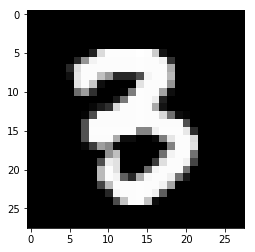

In [6]:
index = 42
print(np.argmax(y_train[index]))
plt.imshow(x_train[index].reshape(28,28), cmap='gray')

In [7]:
print(np.sum(y_train, axis=0))

[5454. 6091. 5522. 5704. 5250. 5065. 5444. 5733. 5327. 5410.]


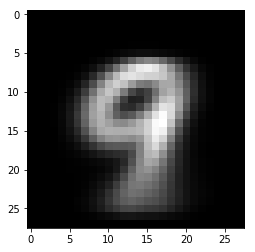

In [8]:
digit = 9
plt.imshow(x_train[np.argmax(y_train, axis=1) == digit].mean(axis=0).reshape(28,28), cmap='gray')

In [9]:
X = tf.placeholder(tf.float32, shape=(None, 784), name='X')
labels = tf.placeholder(tf.float32, shape=(None, 10), name='Labels')

In [10]:
w1 = tf.Variable(name='w1', initial_value=tf.random_normal(shape=(784, 128), dtype=tf.float32))
b1 = tf.Variable(name='b1', initial_value=tf.zeros(shape=(1,128), dtype=tf.float32))

a1 = tf.matmul(X, w1) + b1
z1 = tf.nn.relu(a1)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
w2 = tf.Variable(name='w2', initial_value=tf.random_normal(shape=(128, 32), dtype=tf.float32))
b2 = tf.Variable(name='b2', initial_value=tf.zeros(shape=(1,32), dtype=tf.float32))

a2 = tf.matmul(z1, w2) + b2
z2 = tf.nn.relu(a2)

In [12]:
w3 = tf.Variable(name='w3', initial_value=tf.random_normal(shape=(32, 10), dtype=tf.float32))
b3 = tf.Variable(name='b3', initial_value=tf.zeros(shape=(1,10), dtype=tf.float32))

y = tf.matmul(z2, w3) + b3

In [13]:
loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=y)
step = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [15]:
BATCH_SIZE = 64
EPOCHS = 100
m = len(x_train)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for epoch in range(EPOCHS):
    for i in range(BATCH_SIZE, m, BATCH_SIZE):
        x_batch = x_train[i-BATCH_SIZE:i]
        y_batch = y_train[i-BATCH_SIZE:i]
        sess.run(step, feed_dict={X:x_batch, labels:y_batch})
    if (epoch+1) % 5 == 0:
        predictions, test_loss = sess.run([y, loss], feed_dict={X:x_test, labels:y_test})
        accuracy = np.mean(np.argmax(y_test, axis=1) == np.argmax(predictions, axis=1))
        print('Epoch: %d\tloss:  %1.4f\taccuracy: %1.4f' % (epoch+1, test_loss, accuracy))

Epoch: 5	loss:  1.4750	accuracy: 0.5207
Epoch: 10	loss:  0.9813	accuracy: 0.8026
Epoch: 15	loss:  0.7401	accuracy: 0.8899
Epoch: 20	loss:  0.5816	accuracy: 0.9186
Epoch: 25	loss:  0.5743	accuracy: 0.9315
Epoch: 30	loss:  0.5118	accuracy: 0.9369
Epoch: 35	loss:  0.5394	accuracy: 0.9421
Epoch: 40	loss:  0.5169	accuracy: 0.9394
Epoch: 45	loss:  0.4762	accuracy: 0.9462
Epoch: 50	loss:  0.5675	accuracy: 0.9481
Epoch: 55	loss:  0.5733	accuracy: 0.9465
Epoch: 60	loss:  0.5121	accuracy: 0.9457
Epoch: 65	loss:  0.5203	accuracy: 0.9490
Epoch: 70	loss:  0.5131	accuracy: 0.9509
Epoch: 75	loss:  0.5361	accuracy: 0.9502
Epoch: 80	loss:  0.4698	accuracy: 0.9557
Epoch: 85	loss:  0.5388	accuracy: 0.9548
Epoch: 90	loss:  0.5205	accuracy: 0.9533
Epoch: 95	loss:  0.5296	accuracy: 0.9554
Epoch: 100	loss:  0.5711	accuracy: 0.9510


In [16]:
predictions = sess.run(y, feed_dict={X:x_test})

Prediction: 3, Label: 3


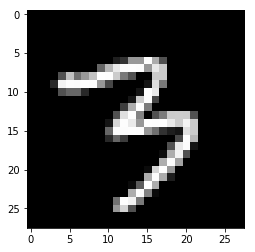

In [18]:
index = 3
print('Prediction: %d, Label: %d' % (np.argmax(predictions[index]), np.argmax(y_test[index])))
plt.imshow(x_test[index].reshape(28,28), cmap='gray')